# Week 2 Exercise: bla bla bla

We will start by reading the data.

In [1]:
%matplotlib inline
import pandas
import numpy
from sklearn.cross_validation import train_test_split
import sklearn.metrics
import matplotlib.pylab as plt
from sklearn.ensemble import ExtraTreesClassifier



"""
Data Engineering and Analysis
"""
#Load the dataset

fileName = "nesarc_pds_test.csv"

data = pandas.read_csv(fileName, low_memory=False)

print ("File used: " + fileName)

File used: nesarc_pds_test.csv


In [2]:
data['S1Q5B'] = pandas.to_numeric(data['S1Q5B'], errors='coerce') #AGE WHEN FIRST CHILD BORN/STARTED LIVING WITH RESPONDENT
data['S1Q11A'] = pandas.to_numeric(data['S1Q11A'], errors='coerce') #TOTAL FAMILY INCOME IN LAST 12 MONTHS
data['S1Q6A'] = pandas.to_numeric(data['S1Q6A'], errors='coerce') #HIGHEST GRADE OR YEAR OF SCHOOL COMPLETED
data['S1Q1F'] = pandas.to_numeric(data['S1Q1F'], errors='coerce')#S1Q1F BORN IN UNITED STATES
data['S1Q8A'] = pandas.to_numeric(data['S1Q8A'], errors='coerce')#S1Q8A WORK AT JOB OR BUSINESS IN LAST 12 MONTHS
data['S1Q16'] = pandas.to_numeric(data['S1Q16'], errors='coerce')#S1Q16 SELF-PERCEIVED CURRENT HEALTH

my_data = data[['SEX','MARITAL','S1Q5B','S1Q6A','S1Q11A','S1Q1F','S1Q8A','S1Q16']]

my_data['S1Q5B'] = my_data['S1Q5B'].replace(99,numpy.NaN)
my_data['S1Q1F'] = my_data['S1Q1F'].replace(9,numpy.NaN)
my_data['S1Q16'] = my_data['S1Q16'].replace(9,numpy.NaN)


data_clean = my_data.dropna()

#Create scondary variable IS_MARRIED
def IS_MARRIED (row):
   if row['MARITAL'] == 1 :
      return 0
   if row['MARITAL'] == 2 :
      return 0
   else:
      return 1
data_clean['IS_MARRIED'] = data_clean.apply (lambda row: IS_MARRIED (row),axis=1)

#Limit the analysis to people who are married
data_clean = data_clean[(data_clean['IS_MARRIED'] == 0)]


#Create scondary variable EARN_MORE_THAN_MEDIAN. This will be my response variable
S1Q11A_median = data_clean['S1Q11A'].median()
def EARN_MORE_THAN_MEDIAN (row):
    if row['S1Q11A'] >= S1Q11A_median:
        return 0
    else:
        return 1
data_clean['EARN_MORE_THAN_MEDIAN'] = data_clean.apply (lambda row: EARN_MORE_THAN_MEDIAN (row),axis=1)
            
    
print(data_clean.describe())

C:\Users\Stephane\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Stephane\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Stephane\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

               SEX      MARITAL        S1Q5B        S1Q6A          S1Q11A  \
count  3236.000000  3236.000000  3236.000000  3236.000000     3236.000000   
mean      1.534302     1.043881    24.324166     9.272868    52223.496910   
std       0.498899     0.204863     5.494495     2.550513    56460.750464   
min       1.000000     1.000000    14.000000     1.000000       26.000000   
25%       1.000000     1.000000    20.000000     8.000000    24000.000000   
50%       2.000000     1.000000    23.000000     9.000000    41000.000000   
75%       2.000000     1.000000    27.000000    11.000000    66225.000000   
max       2.000000     2.000000    55.000000    14.000000  1118000.000000   

             S1Q1F        S1Q8A        S1Q16  IS_MARRIED  \
count  3236.000000  3236.000000  3236.000000        3236   
mean      1.201792     1.283684     2.345797           0   
std       0.401400     0.450855     1.147547           0   
min       1.000000     1.000000     1.000000           0   
25%   

C:\Users\Stephane\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [3]:
"""
Modeling and Prediction
"""
#Split into training and testing sets

predictors = data_clean[['SEX','S1Q5B','S1Q6A','S1Q1F','S1Q8A','S1Q16']]

targets = data_clean.EARN_MORE_THAN_MEDIAN

pred_train, pred_test, tar_train, tar_test  = train_test_split(predictors, targets, test_size=.4)

pred_train.shape
pred_test.shape
tar_train.shape
tar_test.shape

#Build model on training data
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier(n_estimators=25)
classifier=classifier.fit(pred_train,tar_train)

predictions=classifier.predict(pred_test)

print(sklearn.metrics.confusion_matrix(tar_test,predictions))
print(sklearn.metrics.accuracy_score(tar_test, predictions))




[[435 187]
 [231 442]]
0.67722007722


In [4]:
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(pred_train,tar_train)
# display the relative importance of each attribute
print(model.feature_importances_)



[ 0.03111899  0.40001431  0.30354008  0.04507855  0.10334029  0.11690778]


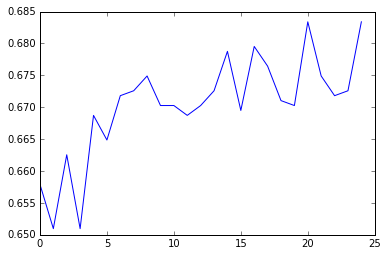

In [5]:

"""
Running a different number of trees and see the effect
 of that on the accuracy of the prediction
"""

trees=range(25)
accuracy=numpy.zeros(25)

for idx in range(len(trees)):
   classifier=RandomForestClassifier(n_estimators=idx + 1)
   classifier=classifier.fit(pred_train,tar_train)
   predictions=classifier.predict(pred_test)
   accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, predictions)
   
plt.cla()
plt.plot(trees, accuracy)